In [130]:
import pandas as pd
import numpy as np
import chardet
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import string
import langdetect 
import nltk
import utils.data_processing_utils as util

In [131]:
#Print unique authors and length of dataset
def print_info_df(data,label):
    print("The author dataset contains {} datapoints.".format(len(data)))
    print("There are {} unique authors.".format(len(data[label].unique())))

In [132]:
def most_frequent_ngrams(lst_tokens,author_name):

    fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(30,30))
    fig.suptitle("Most frequent words", fontsize=15,)
    
    #unigrams
    dic_words_freq = nltk.FreqDist(lst_tokens)
    dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
    dtf_uni.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
    ax[0].set(ylabel=None)
    
    #bigrams
    dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
    dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
    dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
    dtf_bi.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
    ax[1].set(ylabel=None)



    #trigrams
    dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 3))
    dtf_tri = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
    dtf_tri["Word"] = dtf_tri["Word"].apply(lambda x: " ".join(
                   string for string in x) )
    dtf_tri.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Trigrams", ax=ax[2],
                  legend=False).grid(axis='x')
    ax[2].set(ylabel=None)
    plt.savefig("outputs/most_common_ngrams_{}.eps".format(author_name), format='eps')
    plt.show()

In [133]:
#Parameters
file_name = "authorship_dataset.csv"
#file_name = "processed_data.csv"

In [134]:
data = pd.read_csv(file_name)

In [135]:
#There are 23 unique authors with in the data 
print_info_df(data,"username")

The author dataset contains 63019 datapoints.
There are 23 unique authors.


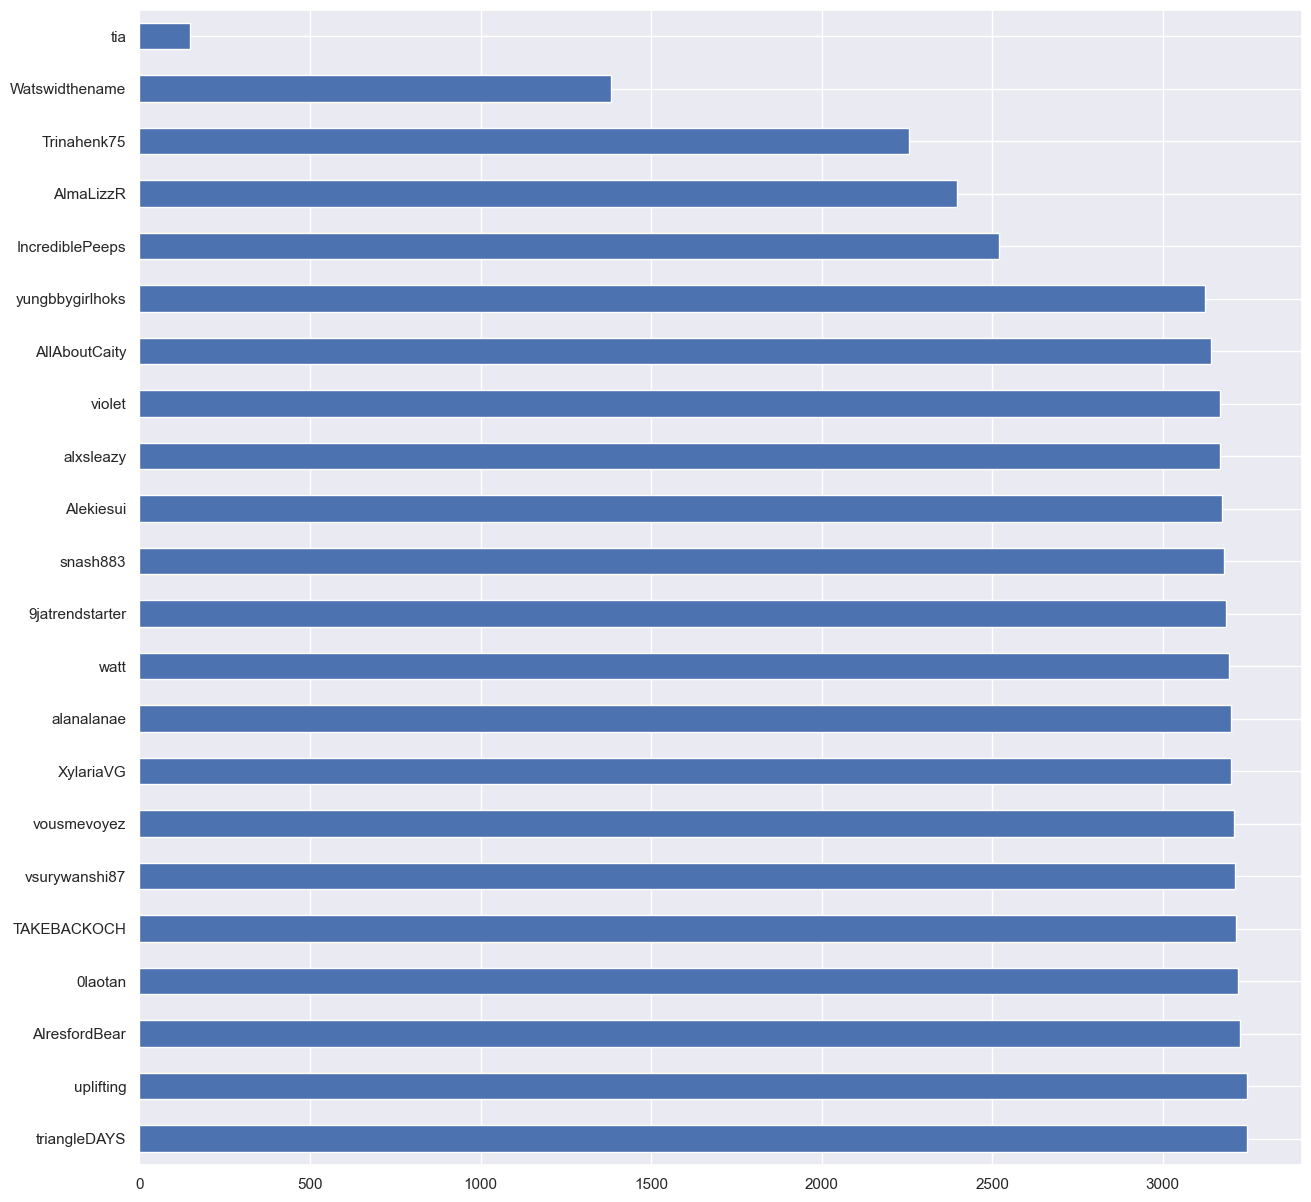

In [158]:
#Graph all the different count of Authors
CountStatus = data['username'].value_counts()
CountStatus
ax = CountStatus.plot.barh()
plt.savefig("outputs/author_distribution.eps", format='eps')

In [137]:
languages = []
for row in data['raw_text']:
    try:
        language = langdetect.detect(row)
    except:
        language = "NA"
    languages.append(language)

number_of_languages = len(np.unique(languages))

In [138]:
print("The corpus contains the following languages: {}".format(np.unique(languages)))
print("There are {} languages.".format((number_of_languages)))

The corpus contains the following languages: ['NA' 'af' 'ar' 'bg' 'ca' 'cs' 'cy' 'da' 'de' 'el' 'en' 'es' 'et' 'fi'
 'fr' 'hi' 'hr' 'hu' 'id' 'it' 'ja' 'ko' 'lt' 'lv' 'mr' 'nl' 'no' 'pl'
 'pt' 'ro' 'ru' 'sk' 'sl' 'so' 'sq' 'sv' 'sw' 'th' 'tl' 'tr' 'uk' 'vi']
There are 42 languages.


C:\Users\leobl\AppData\Local\Temp\ipykernel_15244\2194368279.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data[y]==i][x], hist=True, kde=False,
C:\Users\leobl\AppData\Local\Temp\ipykernel_15244\2194368279.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data[y]==i]

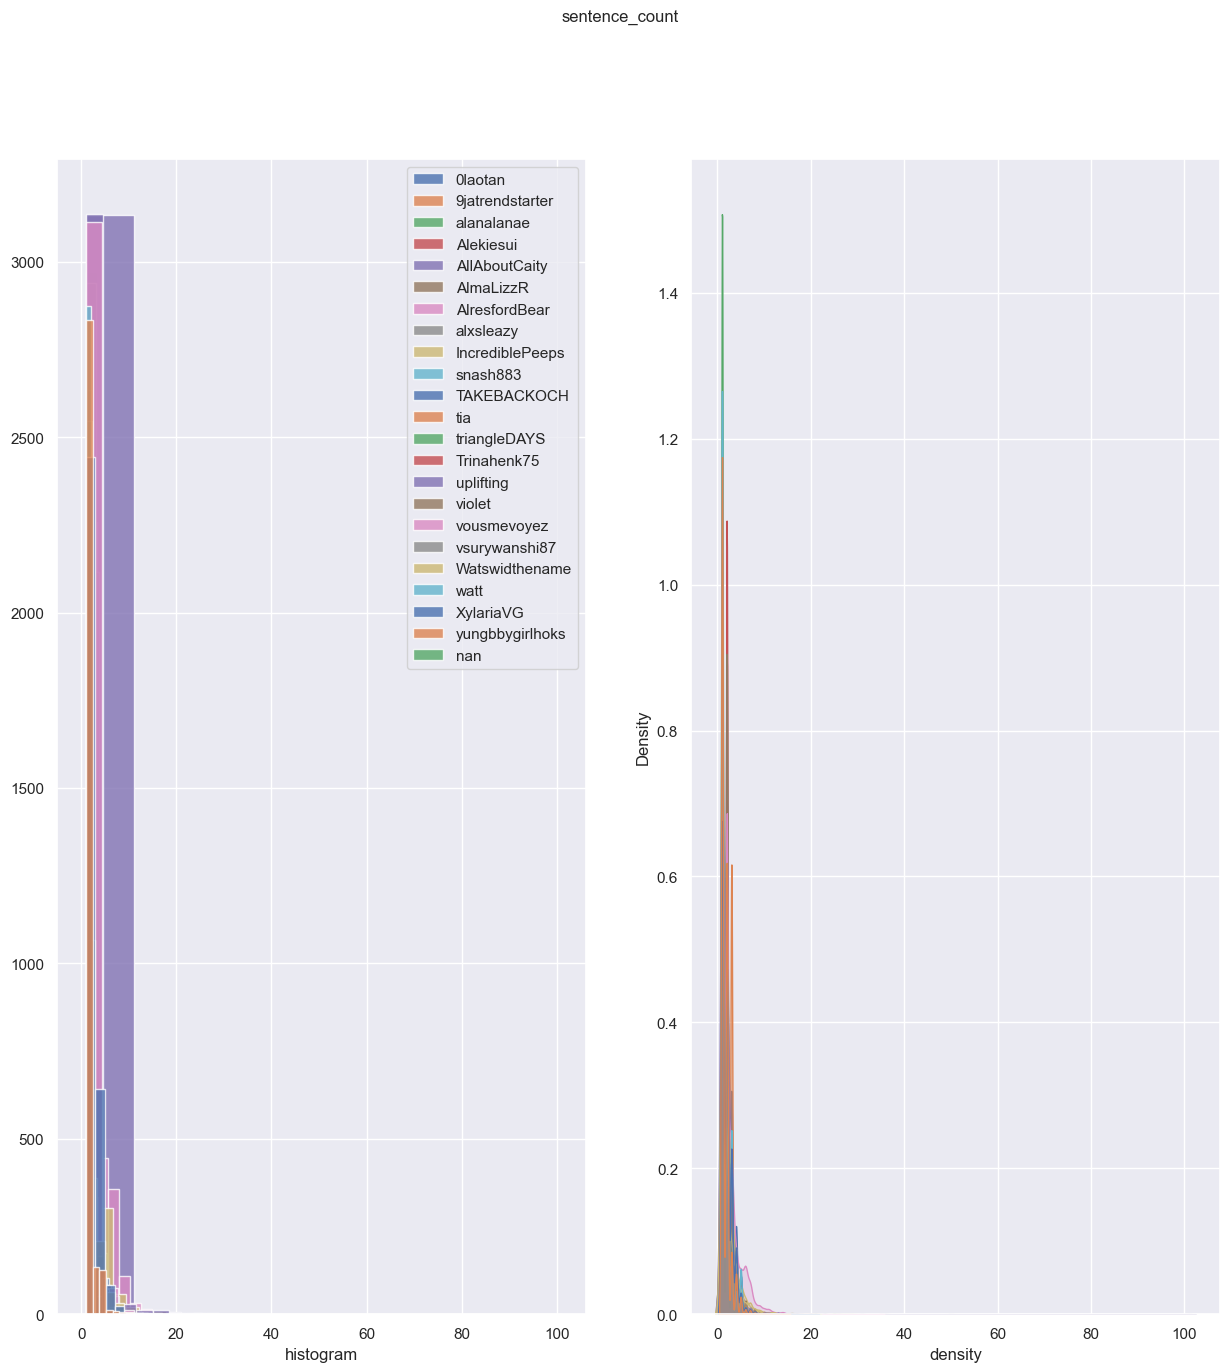

In [169]:
data['word_count'] = data["raw_text"].apply(lambda x: len(str(x).split(" ")))
data['char_count'] = data["raw_text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
data['sentence_count'] = data["raw_text"].apply(lambda x: len(str(x).split(".")))
data['avg_word_length'] = data['char_count'] / data['word_count']
data['avg_sentence_length'] = data['word_count'] / data['sentence_count']
data.head()


x, y = "sentence_count", "username"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
sns.set(rc={'figure.figsize':(15,15)})

for i in data[y].unique():
    sns.distplot(data[data[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(data[data[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(data[y].unique())
ax[1].grid(True)
plt.savefig("outputs/sentence_count_distribution.eps", format='eps')
plt.show()


C:\Users\leobl\AppData\Local\Temp\ipykernel_15244\3649853314.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data[y]==i][x], hist=True, kde=False,
C:\Users\leobl\AppData\Local\Temp\ipykernel_15244\3649853314.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data[y]==i]

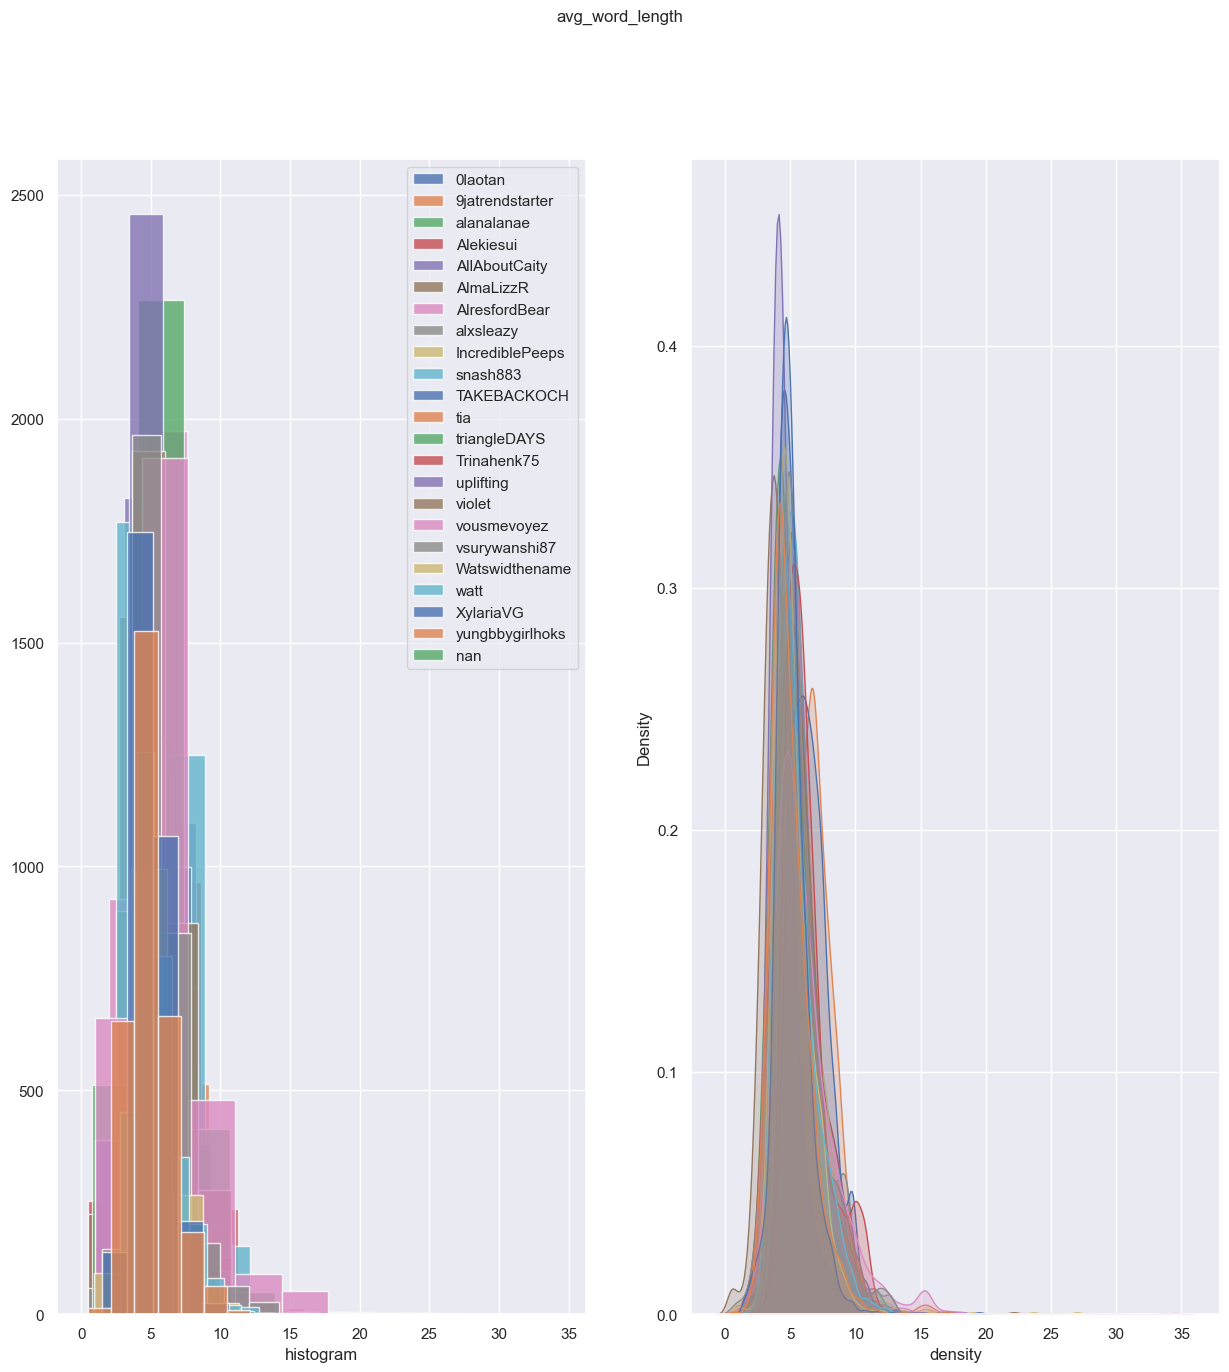

In [170]:
data['word_count'] = data["raw_text"].apply(lambda x: len(str(x).split(" ")))
data['char_count'] = data["raw_text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
data['sentence_count'] = data["raw_text"].apply(lambda x: len(str(x).split(".")))
data['avg_word_length'] = data['char_count'] / data['word_count']
data['avg_sentence_length'] = data['word_count'] / data['sentence_count']
data.head()


x, y = "avg_word_length", "username"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
sns.set(rc={'figure.figsize':(15,15)})

for i in data[y].unique():
    sns.distplot(data[data[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(data[data[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(data[y].unique())
ax[1].grid(True)
plt.savefig("outputs/avg_word_length_distribution.eps", format='eps')
plt.show()


C:\Users\leobl\AppData\Local\Temp\ipykernel_15244\2541723654.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data[y]==i][x], hist=True, kde=False,
C:\Users\leobl\AppData\Local\Temp\ipykernel_15244\2541723654.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data[y]==i]

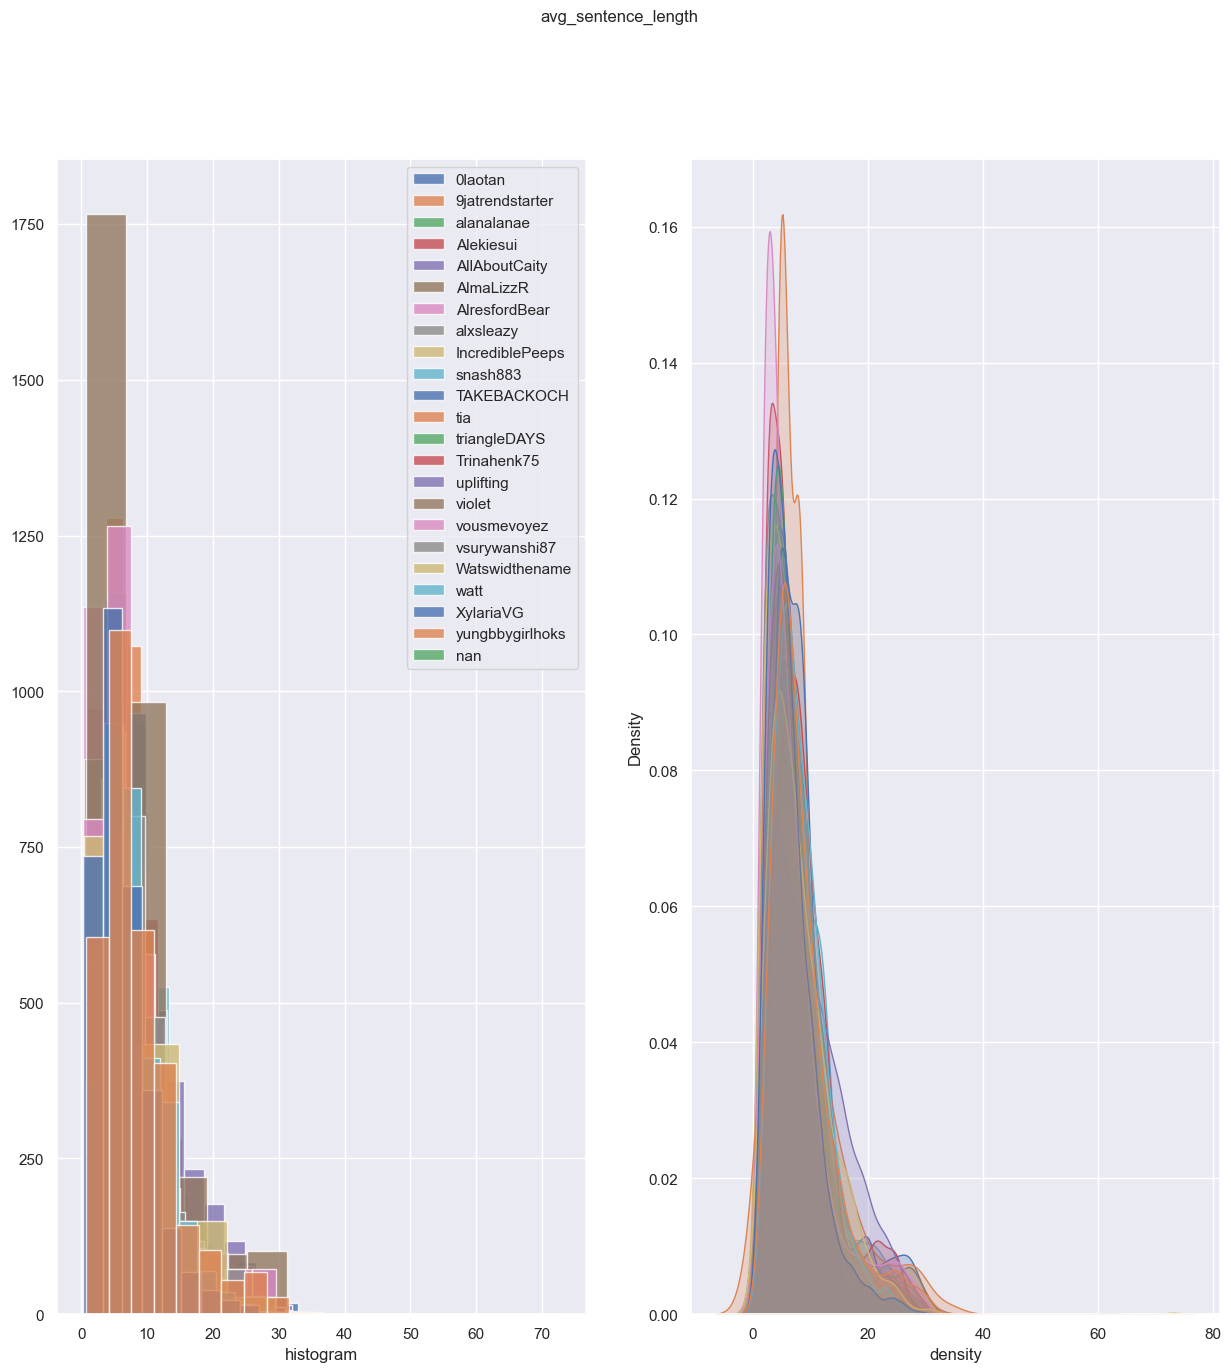

In [171]:
data['word_count'] = data["raw_text"].apply(lambda x: len(str(x).split(" ")))
data['char_count'] = data["raw_text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
data['sentence_count'] = data["raw_text"].apply(lambda x: len(str(x).split(".")))
data['avg_word_length'] = data['char_count'] / data['word_count']
data['avg_sentence_length'] = data['word_count'] / data['sentence_count']
data.head()


x, y = "avg_sentence_length", "username"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
sns.set(rc={'figure.figsize':(15,15)})

for i in data[y].unique():
    sns.distplot(data[data[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(data[data[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(data[y].unique())
ax[1].grid(True)
plt.savefig("outputs/avg_sentence_length_distribution.eps", format='eps')
plt.show()

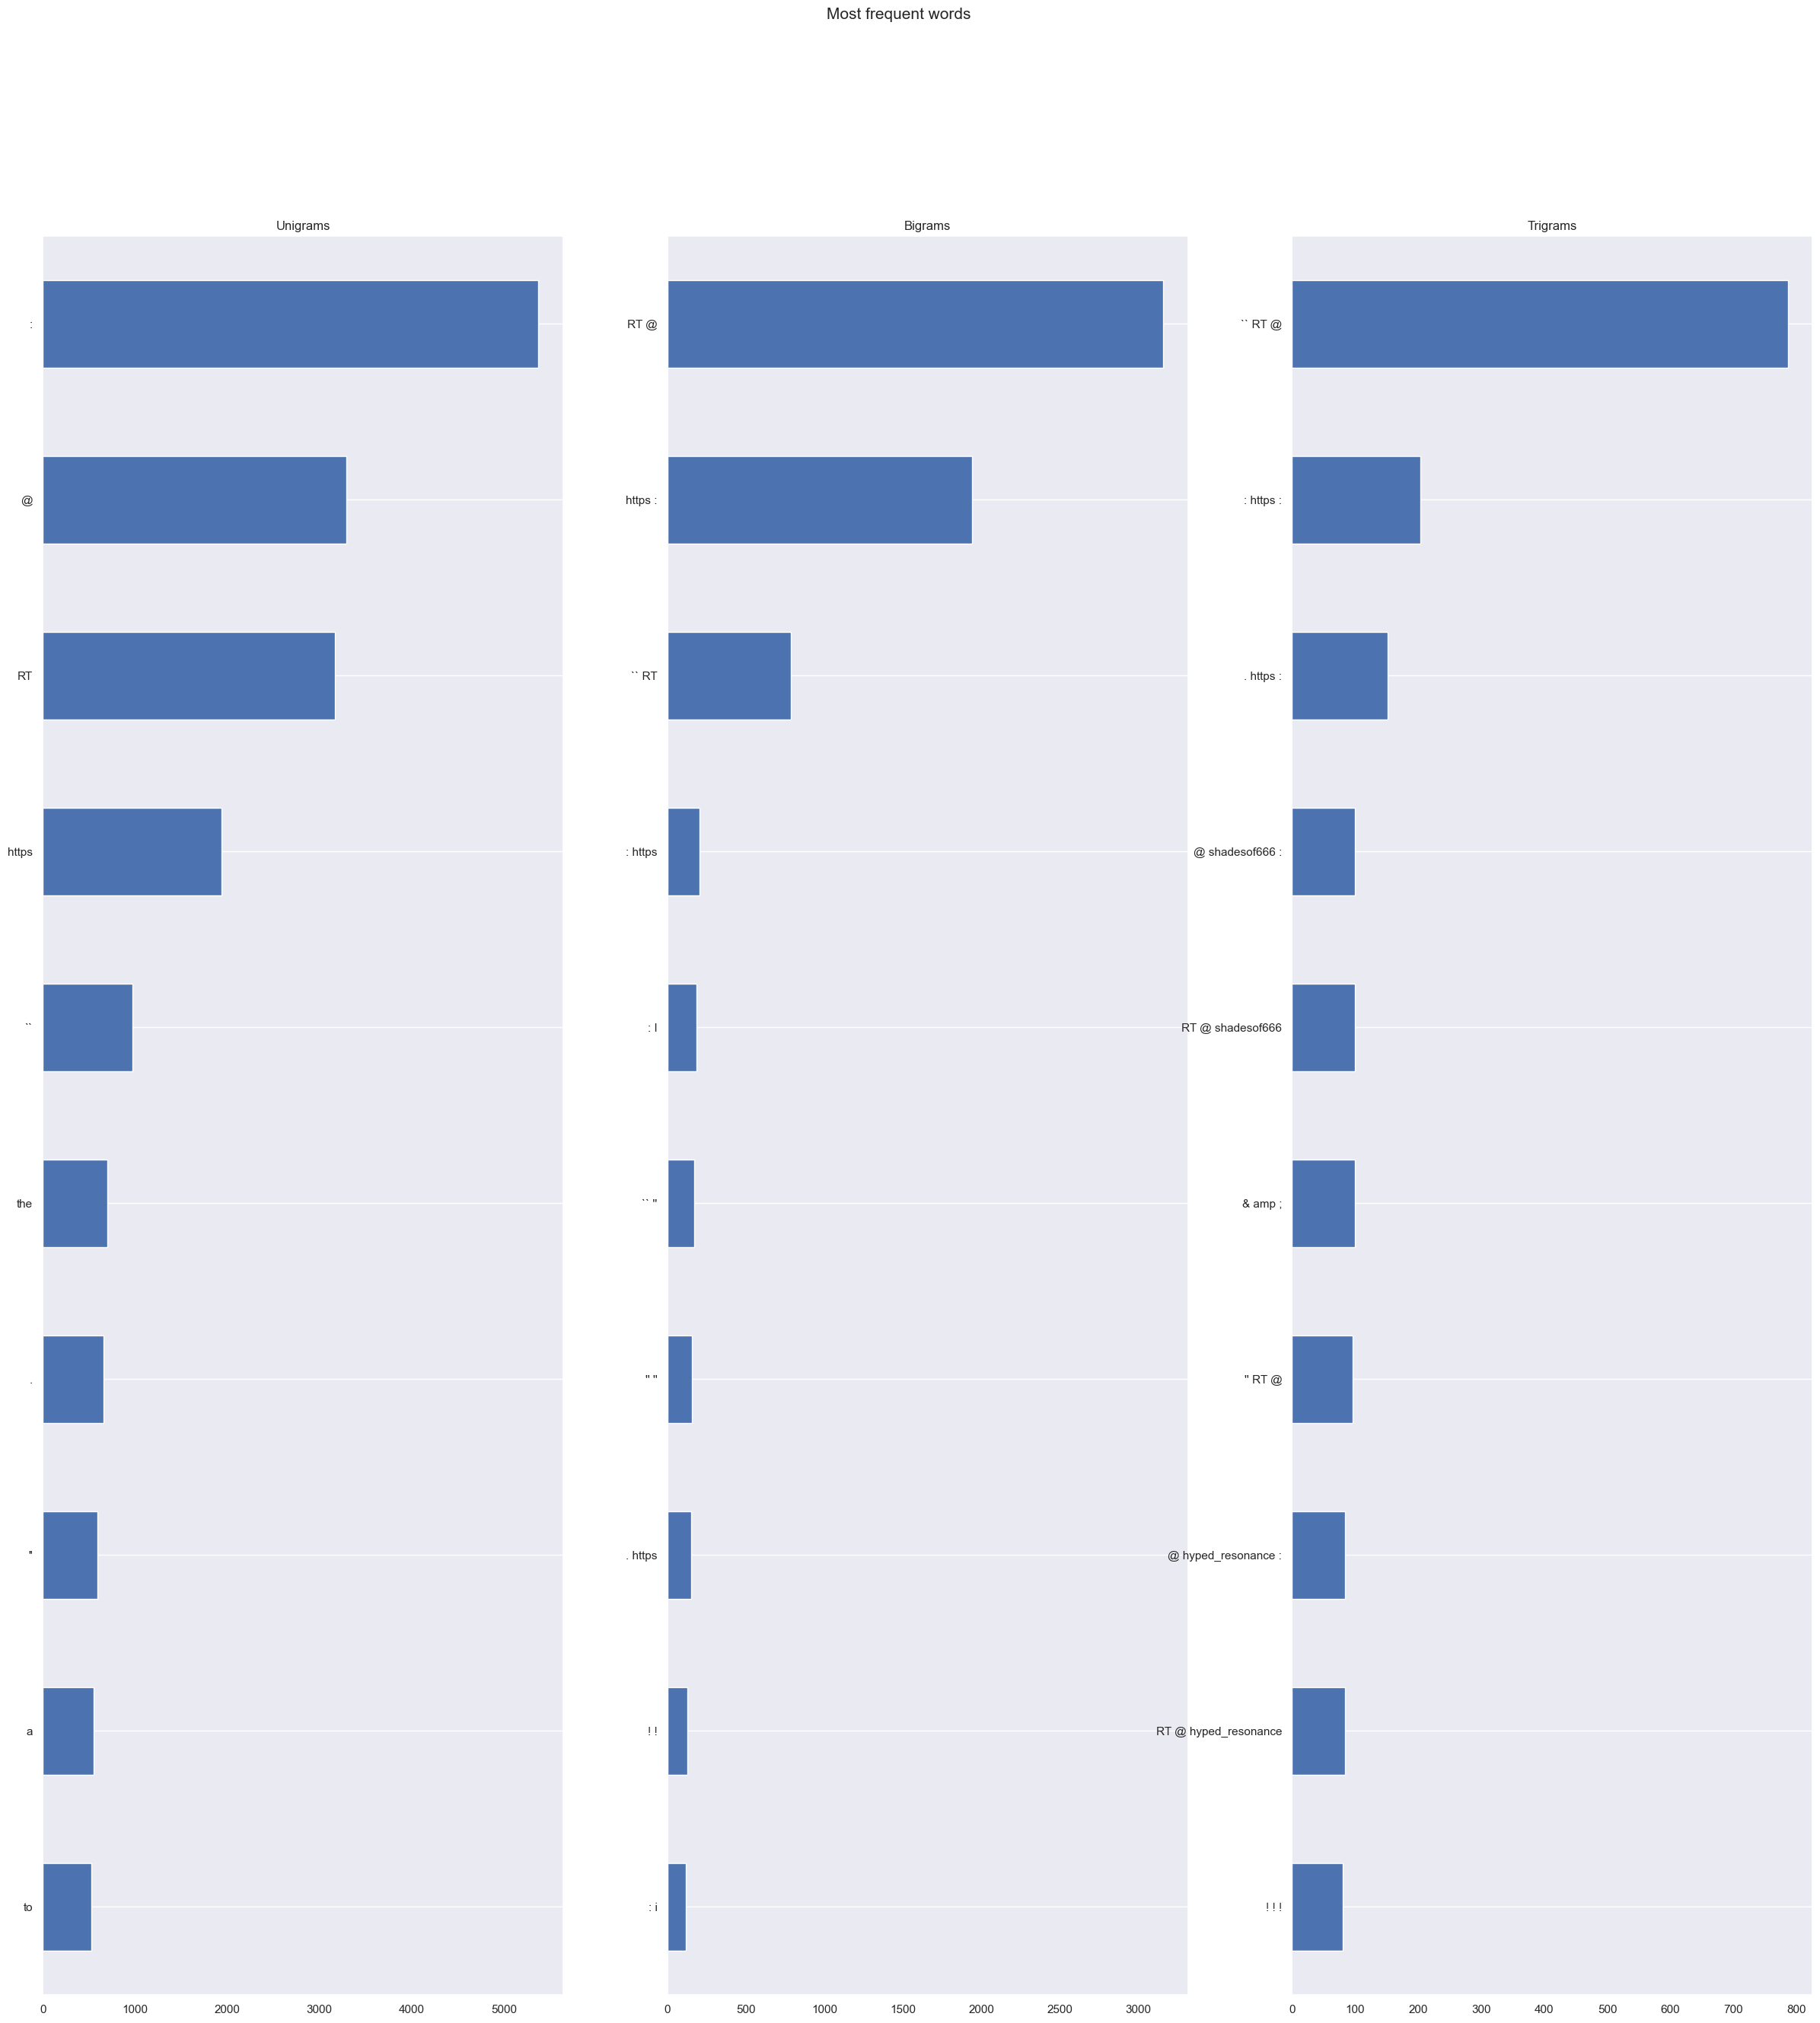

In [140]:

data["username"] = data["username"].str.replace(" ", "")

author_name = "violet"
corpus = data[data["username"]==author_name]["raw_text"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
most_frequent_ngrams(lst_tokens=lst_tokens,author_name = author_name)

In [141]:
# Create word count and character count lists
word_count, char_count, ave_length =  util.getTextMetaInformation(data,"raw_text")

In [142]:
print("Word count statistics")
util.get_stats(word_count)

Word count statistics
Min: 1
Max: 61
Mean: 10.943445627509163
Median 10.0
1st percentile 2.0
95th percentile 23.0
99th percentile 27.0
99.5th Percentile 28.0
99.9th Percentile 30.0


c:\Users\leobl\Desktop\COS801Project\COS801Assignment\Data\utils\data_processing_utils.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(array, kde = False, bins = 70, color = 'blue').set_title(title)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


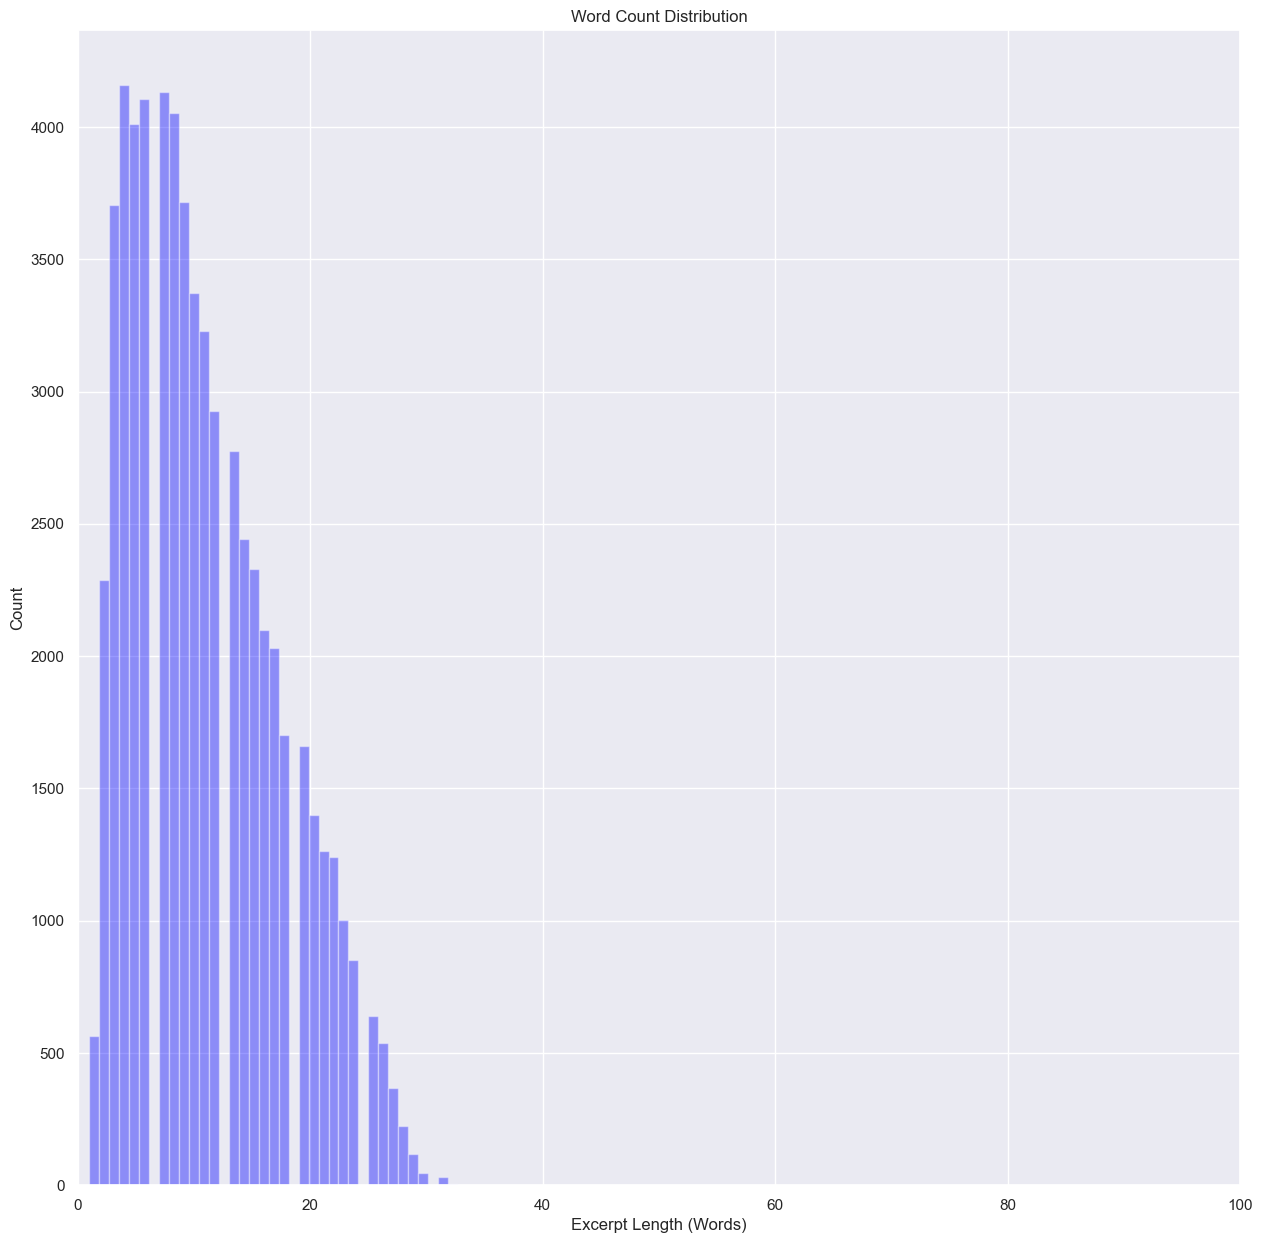

In [143]:
# Plot word count distribution
util.plot_snsplot(word_count,"Word Count Distribution",'Excerpt Length (Words)','Count',"outputs/word_count.eps")

In [144]:
print("\nCharacter count statistics")
util.get_stats(char_count)


Character count statistics
Min: 2
Max: 177
Mean: 74.6652596835875
Median 68.0
1st percentile 11.0
95th percentile 141.0
99th percentile 145.0
99.5th Percentile 145.0
99.9th Percentile 149.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


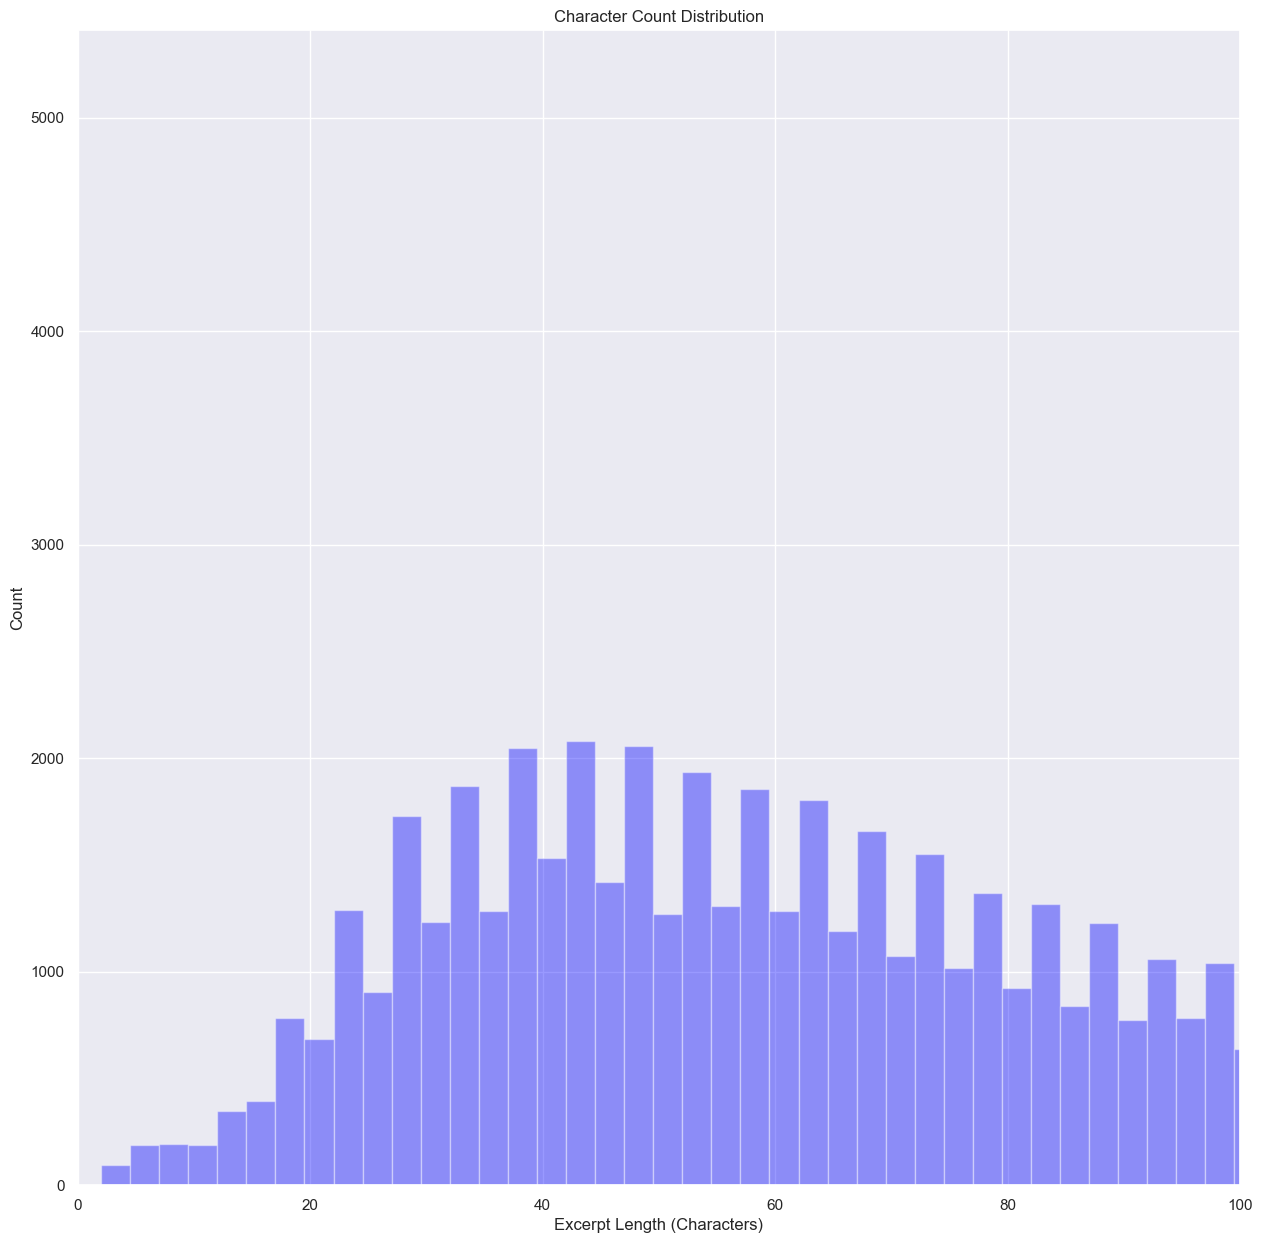

In [145]:
# Plot character count distribution
util.plot_snsplot(char_count,"Character Count Distribution",'Excerpt Length (Characters)','Count',"outputs/char_count.eps")

In [146]:
# Plot average word length distribution
print("\nAverage length statistics")
util.get_stats(ave_length)


Average length statistics
Min: 2.0
Max: 55.0
Mean: 7.46063931241719
Median 6.833333333333333
1st percentile 4.111111111111111
95th percentile 12.4
99th percentile 17.0
99.5th Percentile 19.65166666666604
99.9th Percentile 24.491000000001804


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


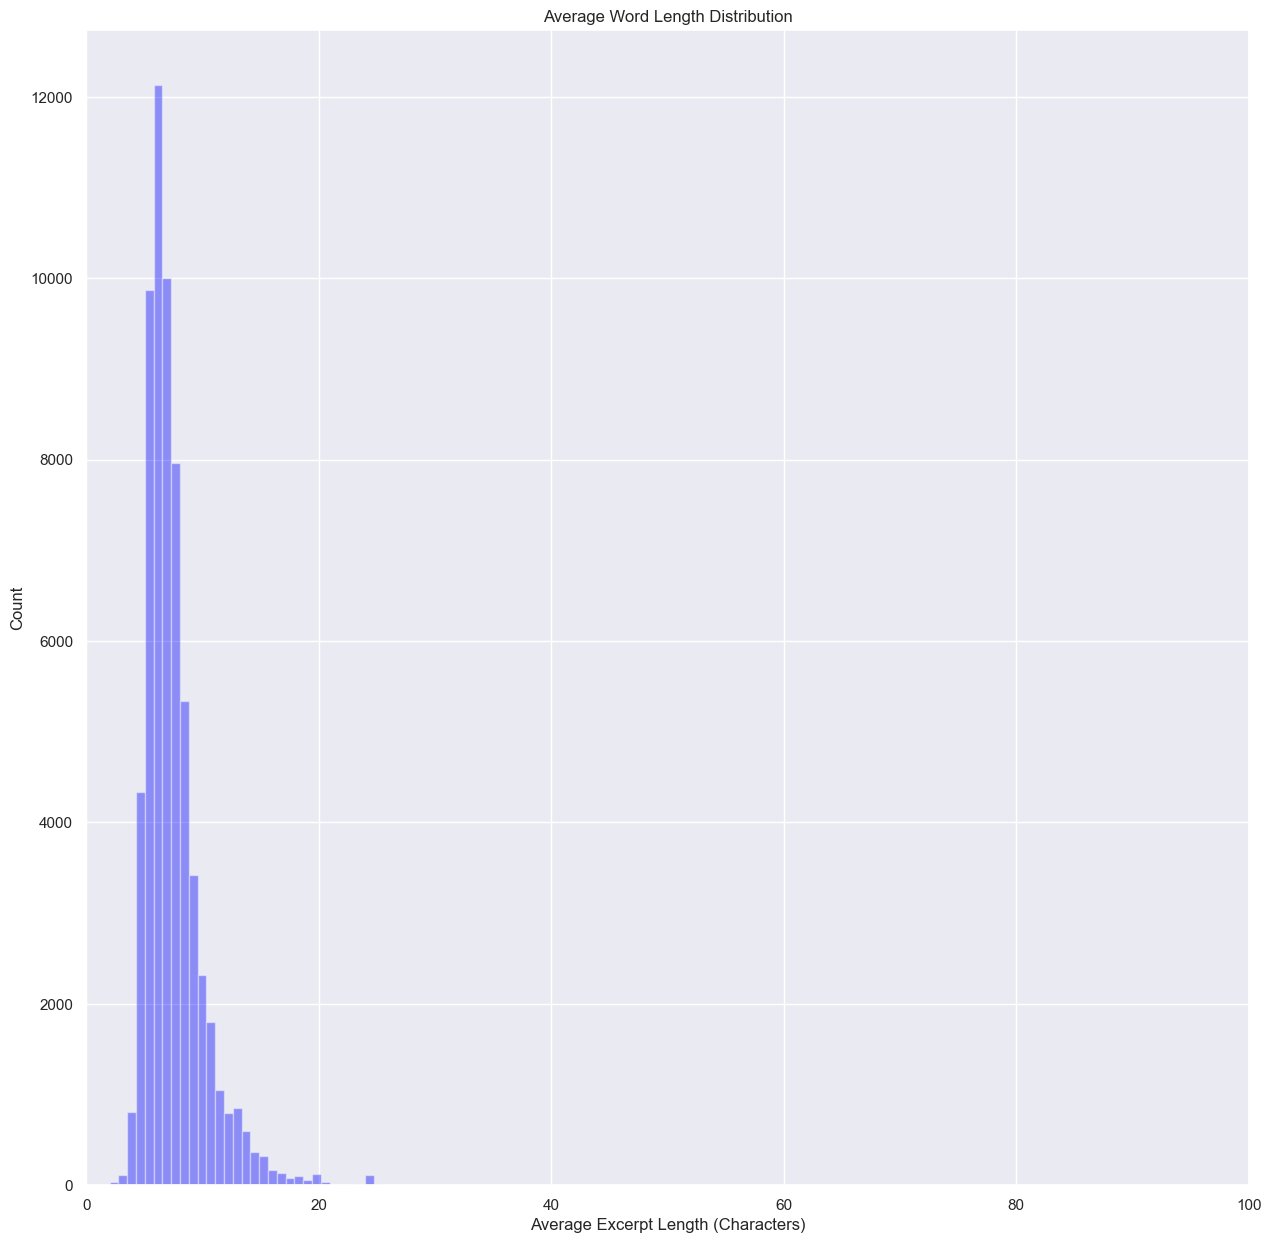

In [147]:
util.plot_snsplot(ave_length,"Average Word Length Distribution",'Average Excerpt Length (Characters)','Count',"outputs/ave_length.eps")

In [148]:
#Get text indexes with short word count 
short_word_count_outliers = util.get_outlier_indexes(word_count, 5, "less")
for i in short_word_count_outliers[0]:
    print("Excerpt {} - Length: {}".format(i, word_count[i]))
    print(data["raw_text"][i], "\n")

Excerpt 0 - Length: 3
 "RT @vxrnvn: Ma'am 

Excerpt 6 - Length: 1
 "son 

Excerpt 7 - Length: 3
 "RT @jackdre02: Bro 

Excerpt 13 - Length: 2
 this. https://t.co/WiUKzhqXp1 

Excerpt 15 - Length: 2
 lol. https://t.co/SHvyAPP6Rf 

Excerpt 23 - Length: 2
 Unfortunate. https://t.co/dxUbUNeqPv 

Excerpt 55 - Length: 2
 Hala Madrid! 

Excerpt 68 - Length: 4
 "Your MCM said Kante 

Excerpt 72 - Length: 4
 someone finally notices. https://t.co/945wYrs6At 

Excerpt 76 - Length: 1
 "Ronaldo 

Excerpt 79 - Length: 3
 "RT @Nigerianscamsss: Instead 

Excerpt 85 - Length: 3
 "RT @femibakre: #UCLFinal 

Excerpt 87 - Length: 4
 """The better BBC"" FC." 

Excerpt 89 - Length: 2
 #KBNueve! #HalaMadrid! 

Excerpt 102 - Length: 4
 RT @TheKeshKid: 😂 https://t.co/nxMIbP7Tdv 

Excerpt 117 - Length: 2
 @TheMayowaAbiru https://t.co/DtVmit5p2V 

Excerpt 118 - Length: 3
 so beautiful. https://t.co/zKmaL0apMa 

Excerpt 120 - Length: 4
 "RT @OfficialSkinny1: United fans 

Excerpt 122 - Length: 4
 RT @DrewskieC: H

In [149]:
#Get text indexes with short word count 
long_word_count_outliers = util.get_outlier_indexes(word_count, 30, "greater")
for i in long_word_count_outliers[0]:
    print("Excerpt {} - Length: {}".format(i, word_count[i]))
    print(data["raw_text"][i], "\n")

Excerpt 32 - Length: 31
 RT @NawRob: I can go ejaculate in the toilet right now and when I pre cum in you while we are having sex there is a chance you will get pre… 

Excerpt 204 - Length: 32
 RT @yung_gleesh: RT @ASAPYams: IF U EAT RAISIN BRAN U A WIERDO MY G /I swear to god mo fukk is u 80 dog lil bran man face ass dnt trust dem… 

Excerpt 908 - Length: 31
 RT @TheyHateDuff: When a chick go back to her ex he take her back same day she hit him up.. cuz all he had was a rotation of hoes.. she had… 

Excerpt 1513 - Length: 32
 RT @Bbillions: The fact that you can eat a egg or be like nah Imma be nice to you raise you like my own child then eat it as a chicken late… 

Excerpt 2556 - Length: 31
 RT @Bdell1014: Your MCM didnt wanna go to jail for that gram of weed he had &amp; led the Cops on a high speed chase &amp; crashed into a gas stati… 

Excerpt 7730 - Length: 31
 i just got a call from some people from laffy but ig they didn't know they was on 3 way but they at the bank giving all

In [150]:
# Get long word length outliers
long_word_length_outliers = util.get_outlier_indexes(ave_length, 23, "greater")
for i in long_word_length_outliers[0]:
    print("Excerpt {} - Average Length: {}".format(i, ave_length[i]))
    print(data["raw_text"][i], "\n")

Excerpt 2401 - Average Length: 24.5
 #BuyNaijaToGrowTheNaira. https://t.co/tnqSdl5ulw 

Excerpt 5507 - Average Length: 23.666666666666668
 #4RealEzeIsTheBest⁠⁠⁠⁠  #4RealEzeIsTheBest⁠⁠⁠⁠  #4RealEzeIsTheBest⁠⁠⁠⁠ 

Excerpt 10166 - Average Length: 30.5
 &gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt; https://t.co/GrTEKKozbg 

Excerpt 10876 - Average Length: 24.0
 https://t.co/yOXGyELCmn 

Excerpt 10890 - Average Length: 24.0
 https://t.co/yOXGyELCmn 

Excerpt 10912 - Average Length: 24.0
 https://t.co/yOXGyELCmn 

Excerpt 10919 - Average Length: 24.0
 https://t.co/yOXGyELCmn 

Excerpt 11197 - Average Length: 24.0
 https://t.co/yOXGyELCmn 

Excerpt 12125 - Average Length: 35.25
 RT @ChickenColeman: LMFAOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO https://t.co/z2CP0PzBaD 

Excerpt 13510 - Average Length: 24.0
 *CAPRICORNS♑️♑️♑️♑️♑️♑️ https://t.co/SxtyD0TveL 

Excerpt 14764 - Average Length: 30.5
 RT @GamePhreak845: Black......Panther...........takes......

In [151]:
# Get short word length outliers
short_word_length_outliers = util.get_outlier_indexes(ave_length, 3.5, "less")
for i in short_word_length_outliers[0]:
    print("Excerpt {} - Average Length: {}".format(i, ave_length[i]))
    print(data["raw_text"][i], "\n")

Excerpt 189 - Average Length: 3.0
 "Q 

Excerpt 4590 - Average Length: 3.0
 ". 

Excerpt 4591 - Average Length: 3.0
 ". 

Excerpt 4592 - Average Length: 3.0
 ". 

Excerpt 4593 - Average Length: 3.0
 ". 

Excerpt 4596 - Average Length: 3.0
 ". 

Excerpt 4597 - Average Length: 3.0
 ". 

Excerpt 4598 - Average Length: 3.0
 ". 

Excerpt 4600 - Average Length: 3.0
 ". 

Excerpt 4719 - Average Length: 3.0
 ". 

Excerpt 6863 - Average Length: 3.3333333333333335
 i was at a 10 now about a 5.5 

Excerpt 7561 - Average Length: 3.142857142857143
 i have to be up for 6 

Excerpt 7605 - Average Length: 3.2
 he so far now 😭 

Excerpt 8278 - Average Length: 3.0
 ik i can do it 

Excerpt 9327 - Average Length: 3.4
 i need a drink 🙄 

Excerpt 9441 - Average Length: 3.3333333333333335
 im in need of a nap 

Excerpt 9523 - Average Length: 3.4
 man i tell you 😂 

Excerpt 9653 - Average Length: 3.375
 I swear I used to be shy 😁 

Excerpt 9704 - Average Length: 3.4
 I feel good rn 😭 

Excerpt 9711 - Average

In [ ]:
# print all unique all excerpts in lower case
util.print_unique_character_counts(data["raw_text"])

In [153]:
# Create list of accented characters
accented_chars = ['ï', 'é', 'ñ', 'è', 'ö', 'æ', 'ô', 'â', 'á', 'à', 'ê', 'ë']
accented_text = util.find_character_list_count(data["raw_text"],accented_chars)

There are 351 texts containing the characters provided.


In [154]:
# Print accented texts
for i in accented_text:
    print("Excerpt {}".format(i))
    print(data["raw_text"] + '\n')

Excerpt 32773
0                                     "RT @vxrnvn: Ma'am\n
1               "RT @iAmTerrace: Child &gt; Relationship\n
2         "RT @akintonmide: Folks who see keyboard boys...
3         "RT @iEatFatKidsFood: We all trying to throw ...
4                     "Appreciate a pair of nice titties\n
                               ...                        
63014     RT @ariyanaparker: I wanna get off this islan...
63015          "RT @OpIndia_com: NDTV: The Transformers \n
63016     "RT @1sInto2s: Bangladesh and Pakistan discus...
63017     "RT @jjoggomi_ty: 170609 출국 10p Upload! #태연 #...
63018     "RT @OnirismThegame: Venez #découvrir ... not...
Name: raw_text, Length: 63019, dtype: object
Excerpt 32799
0                                     "RT @vxrnvn: Ma'am\n
1               "RT @iAmTerrace: Child &gt; Relationship\n
2         "RT @akintonmide: Folks who see keyboard boys...
3         "RT @iEatFatKidsFood: We all trying to throw ...
4                     "Appreciate a pair o

In [155]:
util.count_text_with_string(data["raw_text"],"RT")

35787

In [156]:
rt = data["raw_text"].str.count("RT").sum()
non_rt = len(data)-data["raw_text"].str.count("RT").sum()

print(rt)
print(non_rt)

35787
27232


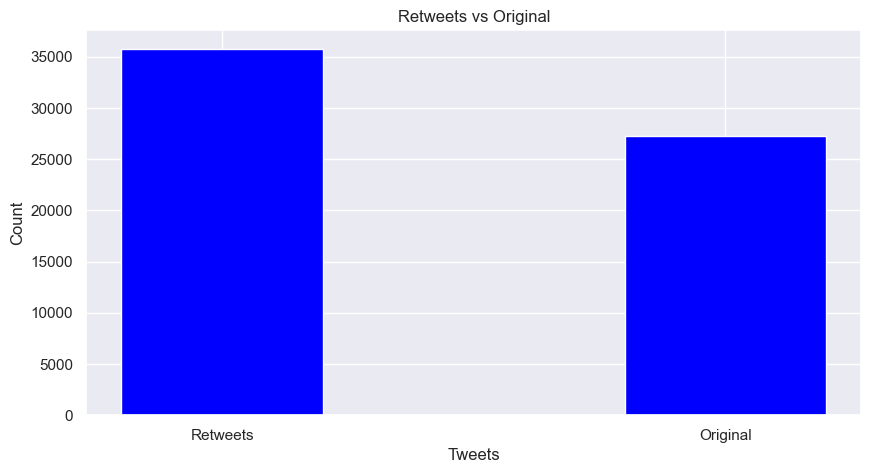

In [157]:
# creating the dataset
info = {'Retweets':data["raw_text"].str.count("RT").sum(), 'Original':len(data)-data["raw_text"].str.count("RT").sum()}
courses = list(info.keys())
values = list(info.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Tweets")
plt.ylabel("Count")
plt.title("Retweets vs Original")
plt.savefig("outputs/RetweetsVsOriginal.eps")
plt.show()

